### Import Packages

In [1]:
import numpy as np
from numpy.linalg import inv
np.set_printoptions(precision=6)

import sys; sys.path.insert(0, '..')
from nmgjunctions.twinning import *

### Lattice parameters & Irrational Element

In [2]:
## Lattice Parameters
a, b, c, gamma = [0.5972,0.5944,0.5584,np.deg2rad(90.37)]

## Irrational Element
q3 = (2*a*b*np.cos(gamma) - np.sqrt(a**4 + b**4 + 2*a**2*b**2*np.cos(2*gamma)))/(a**2 - b**2);
print('q3 = ',round(q3,4))

q3 =  -3.0735


### Metric Tensor

In [3]:
G = np.matrix([[a**2,a*b*np.cos(gamma),0],[a*b*np.cos(gamma),b**2,0],[0,0,c**2]])
print(G)

[[ 0.356648 -0.002292  0.      ]
 [-0.002292  0.353311  0.      ]
 [ 0.        0.        0.311811]]


### Transformation Matrix: $V_1 \to R$

[[ 1.       -0.006427  0.      ]
 [ 0.       -0.995291  0.      ]
 [ 0.        0.       -0.93503 ]]


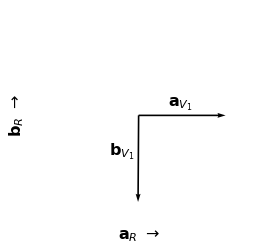

In [4]:
rPv1 = np.matrix([[1,b/a*np.cos(gamma),0],[0,-b/a*np.sin(gamma),0],[0,0,-c/a]]);
print(rPv1)

## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPv1)

ax.text(+0.015,+0.005,r'$\mathbf{a}_{V_1}$',fontsize=16) #label vector a
ax.text(-0.015,-0.02,r'$\mathbf{b}_{V_1}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

### Correspondence Matrix

In [5]:
C = np.matrix([[0,-1,0],[1,0,0],[0,0,1]])
print(C)

[[ 0 -1  0]
 [ 1  0  0]
 [ 0  0  1]]


### shear

In [6]:
s = np.sqrt(np.trace(C.T @ G @ C @ inv(G))-3)
print('s = ', round(s,5))

s =  0.01597


### Non-conventional Twinning Mode

#### Twinning Mode in $V_1 - $frame

In [7]:
## invariant plane
K1 = np.matrix([1,q3,0]);
print('K1 = ', K1)

## shear direction
eta1 = np.matrix([[q3],[-1],[0]]);
print('eta1 = ',eta1)

K1 =  [[ 1.       -3.073543  0.      ]]
eta1 =  [[-3.073543]
 [-1.      ]
 [ 0.      ]]


#### Twinning Mode in $R - $frame

$^R \boldsymbol{l}$ : unit vector parallel to the shear direction

$^R \boldsymbol{m}$ : unit vector normal to the invariant plane


In [8]:
rl = rPv1 @ eta1 #shear direction in R-frame
rl = rl / np.sqrt(rl.T @ rl) #unit vector parallel to shear direction
print(rl)

rm = K1 @ inv(rPv1) #invariant plane in R-frame
rm = rm / np.sqrt(rm @ rm.T) #unit vector normal to invariant plane
print(rm)

[[-0.951173]
 [ 0.308659]
 [ 0.      ]]
[[0.308659 0.951173 0.      ]]


#### Shear Matrix in $R - $frame 

$^RS^i_j = \delta^i_j + s\ ^Rl^i\ ^Rm_j $

In [9]:
## initialize 3 by 3 matrix
rS = np.zeros([3,3])

# Using the einstein notation
#1st row
rS[0,0] = 1 + s * rl.item(0) * rm.item(0) #i=0,j=0
rS[0,1] = 0 + s * rl.item(0) * rm.item(1) #i=0,j=1
rS[0,2] = 0 + s * rl.item(0) * rm.item(2) #i=0,j=2
#2nd row
rS[1,0] = 0 + s * rl.item(1) * rm.item(0) #i=1,j=0
rS[1,1] = 1 + s * rl.item(1) * rm.item(1) #i=1,j=1
rS[1,2] = 0 + s * rl.item(1) * rm.item(2) #i=1,j=2
#3rd row
rS[2,0] = 0 + s * rl.item(2) * rm.item(0) #i=2,j=0
rS[2,1] = 0 + s * rl.item(2) * rm.item(1) #i=2,j=1
rS[2,2] = 1 + s * rl.item(2) * rm.item(2) #i=2,j=2

#convert to matrix and print
rS = np.asmatrix(rS)
print(rS)

[[ 0.99531  -0.014452  0.      ]
 [ 0.001522  1.00469   0.      ]
 [ 0.        0.        1.      ]]


#### Orientation Relationship in $R - $frame

We know,

$^{V_4}\boldsymbol{v}\ \ =\ \ C\ \ ^{V_1}\boldsymbol{u}$

where,

$\boldsymbol{C}\ \ =\ \ ^{V_1}\boldsymbol{L}\ \ ^{V_1} \boldsymbol{S}$,

Thus,

$^R\boldsymbol{L} (V_1 \to V_4)\ \ =\ \ ^R\boldsymbol{P}^{V_1}\ \ \boldsymbol{C}\ \ ^{V_1}\boldsymbol{P}^R\ \ ^R \boldsymbol{S}^{-1}$

In [10]:
rL_v1tov4 = rPv1 @ C @ inv(rPv1) @ inv(rS)
print()
print(rL_v1tov4)

theta1 = np.degrees(np.arccos(rL_v1tov4[0,0]))
theta2 = np.degrees(np.arcsin(rL_v1tov4[0,1]))
print()
print("theta1: {0} degrees & theta2: {1} degrees".format(round(theta1,2),round(theta2,2)))


[[-0.007987  0.999968  0.      ]
 [-0.999968 -0.007987  0.      ]
 [ 0.        0.        1.      ]]

theta1: 90.46 degrees & theta2: 89.54 degrees


Resembles (clockwise) rotation matrix, except the transformation is $(\cos\theta_1, -\sin\theta_2)$, $\theta_1 \simeq \theta_2$

1. $\theta_1 = 90.46^\circ$
2. $\theta_2 = 89.54^\circ$

### Transformation Matrix: $V_4 \to R$

[[-0.007987 -0.995208  0.      ]
 [-0.999968  0.014376  0.      ]
 [ 0.        0.       -0.93503 ]]


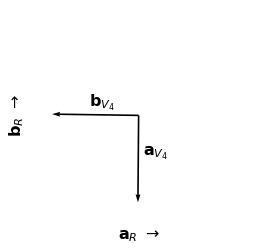

In [11]:
rPv4 = rL_v1tov4 @ rPv1
print(rPv4)

## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPv4)

ax.text(+0.002,-0.02,r'$\mathbf{a}_{V_4}$',fontsize=16) #label vector a
ax.text(-0.025,+0.005,r'$\mathbf{b}_{V_4}$',fontsize=16) #label vector b


ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax